In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf 
import cartopy
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import matplotlib
from scipy.ndimage import gaussian_filter

# Lecture 1: Introduction to Machine Learning and Artifical Intelligence

### In this lecture you will learn:



what I want to cover:

-why is data exploration necessary before diving into the fun stuff?
    -80% of ML is data pre-processing, the rest is model tunning
    -need to look at the data to see what pre-processing might be necessary
-exploring the data, what are we looking at 
    -pandas (different ways that you can slice data)
    -netcdf4 dataset
    -xarray (different ways that you can slice data)
- plotting the data in different ways
    -seaborn
    -cartopy
  
    



<!--![](ml_comic.png)--->

https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

https://medium.com/markdown-monster-blog/getting-images-into-markdown-documents-and-weblog-posts-with-markdown-monster-9ec6f353d8ec

https://nbviewer.jupyter.org/github/djgagne/ams-ml-python-course/blob/master/module_1/ML_Short_Course_Module_1_data_analysis_and_preproc.ipynb

We want our plots to show up in the notebook so run:

In [2]:
%matplotlib inline

### Reading in data using pandas and xarray

In [2]:
import xarray as xr
from netCDF4 import Dataset
import numpy as np
import glob
import os
import pandas as pd

In [3]:
# set the path to the location of the csv files in "data" folder:
#path = '/Users/aburke/Documents/ams-2020-ml-python-course/data_transfer/track_data_ncar_ams_3km_csv_small/'
csv_path = '/Users/aburke/Documents/ams-2020-ml-python-course/data/track_data_ncar_ams_3km_csv_small/'
print(csv_path)
#Find all files in folder that end in ".csv"
csv_files = sorted(glob.glob(csv_path+"*.csv"))
print('Number of csv files: {0}'.format(len(csv_files)))

/Users/aburke/Documents/ams-2020-ml-python-course/data/track_data_ncar_ams_3km_csv_small/
Number of csv files: 100


In [4]:
csv_single_file = pd.read_csv(csv_files[0])

What are our variables?

In [27]:
print(csv_single_file.columns)

Index(['Step_ID', 'Track_ID', 'Ensemble_Name', 'Ensemble_Member', 'Run_Date',
       'Valid_Date', 'Forecast_Hour', 'Valid_Hour_UTC', 'Duration',
       'Centroid_Lon', 'Centroid_Lat', 'Centroid_X', 'Centroid_Y',
       'Storm_Motion_U', 'Storm_Motion_V', 'REFL_COM_mean', 'REFL_COM_max',
       'REFL_COM_min', 'REFL_COM_std', 'REFL_COM_percentile_10',
       'REFL_COM_percentile_25', 'REFL_COM_percentile_50',
       'REFL_COM_percentile_75', 'REFL_COM_percentile_90', 'U10_mean',
       'U10_max', 'U10_min', 'U10_std', 'U10_percentile_10',
       'U10_percentile_25', 'U10_percentile_50', 'U10_percentile_75',
       'U10_percentile_90', 'V10_mean', 'V10_max', 'V10_min', 'V10_std',
       'V10_percentile_10', 'V10_percentile_25', 'V10_percentile_50',
       'V10_percentile_75', 'V10_percentile_90', 'T2_mean', 'T2_max', 'T2_min',
       'T2_std', 'T2_percentile_10', 'T2_percentile_25', 'T2_percentile_50',
       'T2_percentile_75', 'T2_percentile_90', 'RVORT1_MAX-future_mean',
       'RVOR

What does the first five samples look like of the median 10 meter U/V wind field and 2 meter temperature? 

In [17]:
samples = csv_single_file.loc[:,['U10_percentile_50', 'V10_percentile_50', 'T2_percentile_50']]
print(samples.head())

   U10_percentile_50  V10_percentile_50  T2_percentile_50
0            0.27611            4.78568         293.17340
1           -1.08810            5.65116         291.98325
2           -0.36890            2.77814         293.00183
3            1.39530            1.29246         292.66022
4            0.61899            4.36524         292.27325


<br>

What about the last ten samples?

In [18]:
print(samples.tail())

      U10_percentile_50  V10_percentile_50  T2_percentile_50
1467            1.83592            4.93161         288.51936
1468           -1.29388            2.72014         285.69463
1469            5.15135           -4.86577         283.09445
1470            8.17074           -0.64170         281.74910
1471            8.89075            3.43247         277.41621


#### How to read in data from all of the listed files

In [ ]:
#Read in all the files and concatenate them along their columns
#The "unknown" column is idgnored. 

In [5]:
csv_all_files = pd.concat(map(
                        pd.read_csv, csv_files), 
                        ignore_index=True)

How many samples do we have now?

In [168]:
print('Number of samples: {0}'.format(len(csv_all_files)))

Number of samples: 121137


### There are many easy ways to explore csv data using pandas.

We can slice a dataset using row/column names:

In [169]:
#Samples 100 through 106
#Inclusive of last sample
sliced_by_name_inclusive = csv_all_files.loc[100:105, 'U10_percentile_50']
print(sliced_by_name_inclusive)

100   -1.41053
101   -5.09471
102   -2.25204
103    2.11964
104    2.75208
105    0.76290
Name: U10_percentile_50, dtype: float64


In [170]:
#Alternativley, exclusive of last sample
sliced_by_name_exclusive = csv_all_files['U10_percentile_50'][100:105]
print(sliced_by_name_exclusive)

100   -1.41053
101   -5.09471
102   -2.25204
103    2.11964
104    2.75208
Name: U10_percentile_50, dtype: float64


#### We can also slice by index number instead of a column/row name. 

In [171]:
sliced_by_index = csv_all_files.iloc[100:105, 30]
print(sliced_by_index)

100   -1.41053
101   -5.09471
102   -2.25204
103    2.11964
104    2.75208
Name: U10_percentile_50, dtype: float64


#### Slicing by value

In [172]:
sliced_by_value = csv_all_files[csv_all_files.U10_percentile_50 >= 15]
print(sliced_by_value['U10_percentile_50'])

185       15.41091
375       15.07582
595       15.23123
842       15.43215
982       17.89949
            ...   
120327    15.48680
120328    17.25279
120473    18.19596
120474    15.83959
120551    15.39149
Name: U10_percentile_50, Length: 88, dtype: float64


#### We can also use conditionals

In [173]:
sliced_by_conditional= csv_all_files[(csv_all_files.U10_percentile_50 >= 15) &
                                    (csv_all_files.U10_percentile_50 < 17)]
print(sliced_by_conditional['U10_percentile_50'])

185       15.41091
375       15.07582
595       15.23123
842       15.43215
1215      16.11396
            ...   
120232    15.27241
120326    16.69855
120327    15.48680
120474    15.83959
120551    15.39149
Name: U10_percentile_50, Length: 74, dtype: float64


### Beyond slicing, applying basic math functions are simple when using pandas

In [174]:
print('Mean', csv_all_files['U10_percentile_50'].mean())
print('Standard Deviation',csv_all_files['U10_percentile_50'].std())
print('Max',csv_all_files['U10_percentile_50'].max())

Mean 0.32452657941008367
Standard Deviation 4.326152892831315
Max 19.6309


### Handling NaN  or infinity values is critical for ML. Its again simple when using pandas 

In [175]:
#Copy pandas dataframe
copied_data = csv_all_files.copy(deep=True)

#slice dataframe
unknown_sliced_data = copied_data.loc[100:105,'U10_percentile_50']

#Add NaN and inf values
print("Before adding unknown values \n{0}".format(unknown_sliced_data))
unknown_sliced_data[101] = np.nan
unknown_sliced_data[104] = np.inf
print("\nAfter adding unknown values \n{0}".format(unknown_sliced_data))

Before adding unknown values 
100   -1.41053
101   -5.09471
102   -2.25204
103    2.11964
104    2.75208
105    0.76290
Name: U10_percentile_50, dtype: float64

After adding unknown values 
100   -1.41053
101        NaN
102   -2.25204
103    2.11964
104        inf
105    0.76290
Name: U10_percentile_50, dtype: float64


In [176]:
print('Dropping NaNs \n{0}'.format(unknown_sliced_data.dropna(how='any')))
print('\nBackfilling NaNs \n{0}'.format(unknown_sliced_data.fillna(method='backfill')))
print('\nForward filling NaNs \n{0}'.format(unknown_sliced_data.fillna(method='ffill')))
print('\nFill with value \n{0}'.format(unknown_sliced_data.fillna(0)))

Dropping NaNs 
100   -1.41053
102   -2.25204
103    2.11964
104        inf
105    0.76290
Name: U10_percentile_50, dtype: float64

Backfilling NaNs 
100   -1.41053
101   -2.25204
102   -2.25204
103    2.11964
104        inf
105    0.76290
Name: U10_percentile_50, dtype: float64

Forward filling NaNs 
100   -1.41053
101   -1.41053
102   -2.25204
103    2.11964
104        inf
105    0.76290
Name: U10_percentile_50, dtype: float64

Fill with value 
100   -1.41053
101    0.00000
102   -2.25204
103    2.11964
104        inf
105    0.76290
Name: U10_percentile_50, dtype: float64


#### What about the infinity?

Change it to a NaN and use similar functions.

In [177]:
unknown_sliced_data.replace(np.inf,np.nan,inplace=True)
print('Replaced data: \n{0}'.format(unknown_sliced_data))
print('\nFill with value \n{0}'.format(unknown_sliced_data.fillna(0)))

Replaced data: 
100   -1.41053
101        NaN
102   -2.25204
103    2.11964
104        NaN
105    0.76290
Name: U10_percentile_50, dtype: float64

Fill with value 
100   -1.41053
101    0.00000
102   -2.25204
103    2.11964
104    0.00000
105    0.76290
Name: U10_percentile_50, dtype: float64


### Plotting using pandas

Text(0.5, 0, 'Samples')

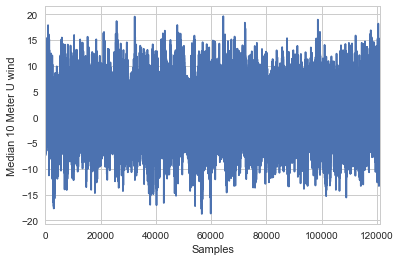

In [178]:
csv_all_files['U10_percentile_50'].plot()
plt.ylabel("Median 10 Meter U wind")
plt.xlabel("Samples")

## Beyond pandas, different plotting packages futher explore dataframes easily

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


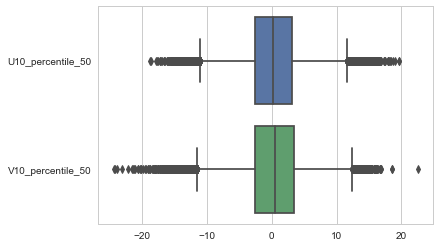

In [48]:
seaborn_plotting_data = csv_all_files.loc[:,['U10_percentile_50', 'V10_percentile_50']]

import seaborn as sns
sns.set_palette("colorblind")
sns.set(style="whitegrid")
sns.boxplot(data=seaborn_plotting_data,orient="h")

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


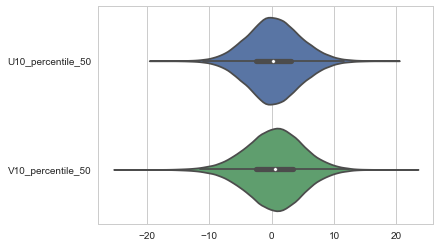

In [8]:
sns.violinplot(data=seaborn_plotting_data,orient="h")

# How to remove outliers?

In [24]:
upper_q = seaborn_plotting_data.quantile(0.95)
lower_q = seaborn_plotting_data.quantile(0.05)
print('Upper quantile \n{0}'.format(upper_q[:10]))
print('\nLower quantile \n{0}'.format(lower_q[:10]))

Upper quantile 
U10_percentile_50    7.564244
V10_percentile_50    7.758882
Name: 0.95, dtype: float64

Lower quantile 
U10_percentile_50   -6.682612
V10_percentile_50   -7.370860
Name: 0.05, dtype: float64


In [89]:
filtered_seaborn = seaborn_plotting_data.copy(deep=True)
filtered_seaborn = filtered_seaborn[(filtered_seaborn < upper_q.values) &
                 (filtered_seaborn >= lower_q.values)].dropna()

print('Number of outliers: {0}'.format(len(seaborn_plotting_data) 
                                       -len(filtered_seaborn)))

Number of outliers: 22577


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


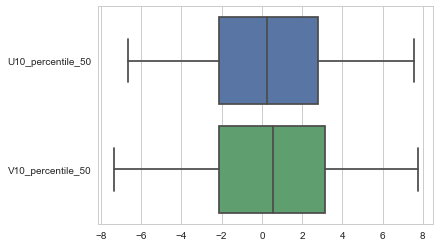

In [90]:
sns.boxplot(data=filtered_seaborn,orient="h")

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


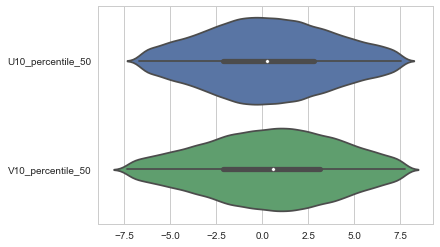

In [91]:
sns.violinplot(data=filtered_seaborn,orient="h")

# Reading netCDF files with netCDF4 and XArray

In [7]:
# set the path to the location of the netcdf files in "data" folder:
nc_path = "/Users/aburke/Documents/ams-2020-ml-python-course/data/track_data_ncar_ams_3km_nc_small/"
print(nc_path)

#Find all files in folder that end in ".nc"
nc_files = sorted(glob.glob(nc_path+"*.nc"))
print('Number of netcdf files: {0}'.format(len(nc_files)))

/Users/aburke/Documents/ams-2020-ml-python-course/data/track_data_ncar_ams_3km_nc_small/
Number of netcdf files: 100


#### Read in a single file using netCDF4

In [29]:
from netCDF4 import Dataset
nf = Dataset(nc_files[0])
print(nf)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: NCARSTORM Storm Patches for run 20101024-0000 member d01
    object_variable: REFL_COM
    dimensions(sizes): p(1472), row(32), col(32)
    variables(dimensions): int32 p(p), int32 row(row), int32 col(col), float32 lon(p,row,col), float32 lat(p,row,col), int32 i(p,row,col), int32 j(p,row,col), float32 x(p,row,col), float32 y(p,row,col), int32 masks(p,row,col), int32 time(p), float32 centroid_lon(p), float32 centroid_lat(p), float32 centroid_i(p), float32 centroid_j(p), int32 track_id(p), int32 track_step(p), float32 REFL_COM_curr(p,row,col), float32 U10_curr(p,row,col), float32 V10_curr(p,row,col), float32 T2_curr(p,row,col), float32 RVORT1_MAX_future(p,row,col), float32 HAIL_MAXK1_future(p,row,col)
    groups: 


#### Read in a single file using XArray

In [30]:
import xarray as xf
xf = xr.open_dataset(nc_files[0])
print(xf)

<xarray.Dataset>
Dimensions:            (col: 32, p: 1472, row: 32)
Coordinates:
  * p                  (p) int32 0 1 2 3 4 5 6 ... 1466 1467 1468 1469 1470 1471
  * row                (row) int32 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * col                (col) int32 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
Data variables:
    lon                (p, row, col) float32 ...
    lat                (p, row, col) float32 ...
    i                  (p, row, col) int32 ...
    j                  (p, row, col) int32 ...
    x                  (p, row, col) float32 ...
    y                  (p, row, col) float32 ...
    masks              (p, row, col) int32 ...
    time               (p) datetime64[ns] ...
    centroid_lon       (p) float32 ...
    centroid_lat       (p) float32 ...
    centroid_i         (p) float32 ...
    centroid_j         (p) float32 ...
    track_id           (p) int32 ...
    track_step         (p) int32 ...
    REFL_COM_curr      (p, row, col) float32 ..

#### Benefits of using XArray:

1. Integrates with numpy and pandas for using multidensional data
<br>
2. Uses dask for better parallelization
<br>
3. 


In [37]:
U_10_meter = xf['U10_curr']
print ("Dimensions:",U_10_meter.dims)
print ("\nCoords:",U_10_meter.coords)
print ("\nAttributes:",U_10_meter.attrs)

Dimensions: ('p', 'row', 'col')

Coords: Coordinates:
  * p        (p) int32 0 1 2 3 4 5 6 7 ... 1465 1466 1467 1468 1469 1470 1471
  * row      (row) int32 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31
  * col      (col) int32 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31

Attributes: {'long_name': 'U10', 'units': ''}


# Tutorial Data Preparation